In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
pip install xlrd

In [74]:
data = pd.read_excel('titanic.xls')

In [76]:
data.shape


(1309, 14)

In [78]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

#  2. Deletion of non representative rows (optional)



In [81]:
data=data.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)



In [83]:
data.head()


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [85]:
data.shape

(1309, 8)

In [87]:
data = data.drop_duplicates()


In [89]:
data.shape

(1114, 8)

In [95]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1114.000000,1114.000000,974.000000,1114.000000,1114.000000,1113.000000
mean,2.219928,0.419210,30.089237,0.515260,0.432675,36.672585
std,0.857878,0.493651,14.724365,0.954603,0.911862,55.055034
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,16.100000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.500000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [105]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [99]:
#imputation

In [109]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
cat_cols = data.select_dtypes(include=["object"]).columns

In [103]:
#2

In [113]:
data[num_cols] = SimpleImputer(strategy="mean").fit_transform(data[num_cols])
data[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(data[cat_cols])


In [115]:
data.describe().loc[["count"]]

,pclass,survived,age,sibsp,parch,fare
count,1114.0,1114.0,1114.0,1114.0,1114.0,1114.0


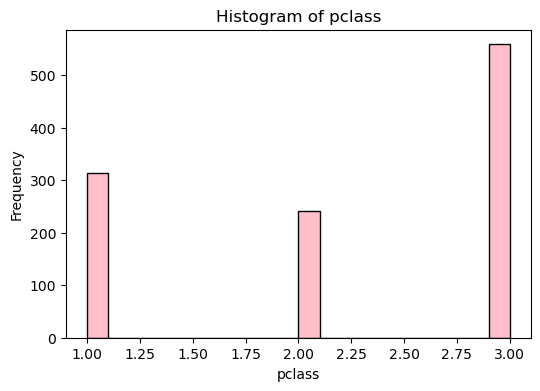

Histogram shows the approximate shape of pclass distribution.



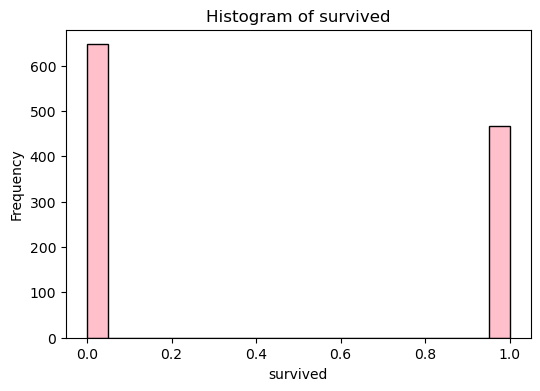

Histogram shows the approximate shape of survived distribution.



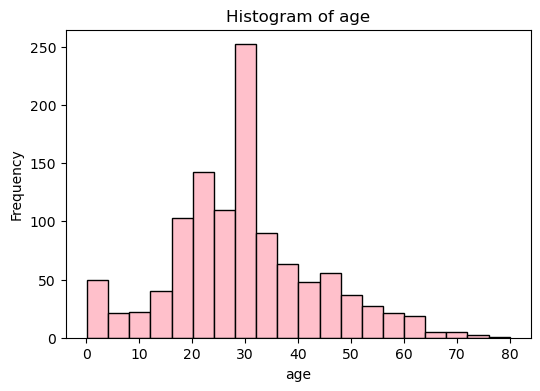

Histogram shows the approximate shape of age distribution.



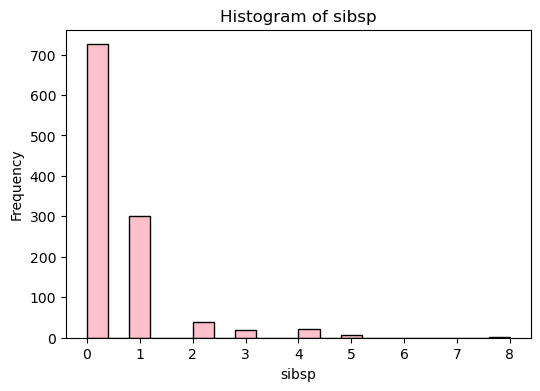

Histogram shows the approximate shape of sibsp distribution.



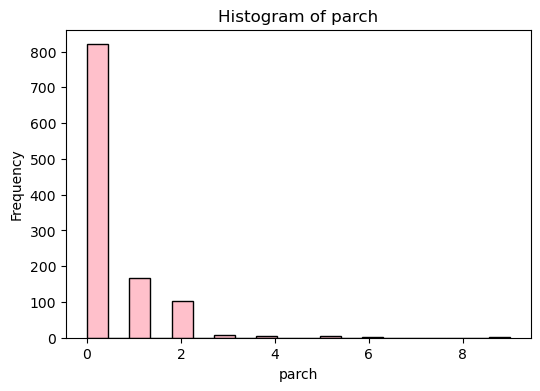

Histogram shows the approximate shape of parch distribution.



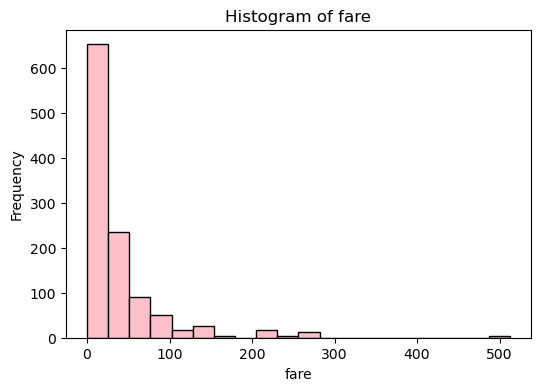

Histogram shows the approximate shape of fare distribution.



In [119]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(data[col].dropna(), bins=20, color='pink', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(f"Histogram shows the approximate shape of {col} distribution.\n")


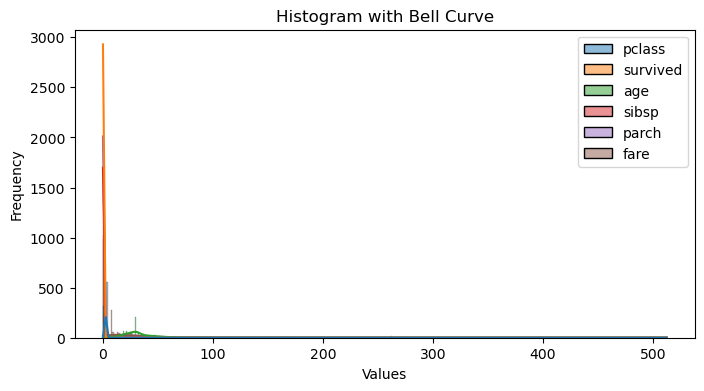

In [123]:
plt.figure(figsize=(8,4))
sns.histplot(data, kde=True)
plt.title("Histogram with Bell Curve")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

In [133]:
# ----- 4. Normalization -----
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])  # only numerical


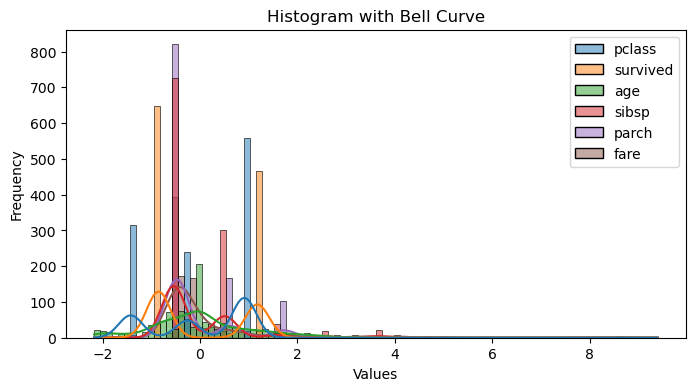

In [135]:
plt.figure(figsize=(8,4))
sns.histplot(data, kde=True)
plt.title("Histogram with Bell Curve")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

In [139]:
# ----- 5. PCA -----
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[num_cols])

data["PC1"] = pca_data[:, 0]
data["PC2"] = pca_data[:, 1]



In [141]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,PC1,PC2
0,-1.422669,1.177047,female,-0.079154,-0.540006,-0.474709,3.175403,S,-3.118707,0.318147
1,-1.422669,1.177047,male,-2.119941,0.508020,1.719590,2.088468,S,-1.764542,2.832890
2,-1.422669,-0.849584,female,-2.041219,0.508020,1.719590,2.088468,S,-1.080642,2.500769
3,-1.422669,-0.849584,male,-0.006485,0.508020,1.719590,2.088468,S,-1.829928,1.693072
4,-1.422669,-0.849584,female,-0.369830,0.508020,1.719590,2.088468,S,-1.696127,1.837304


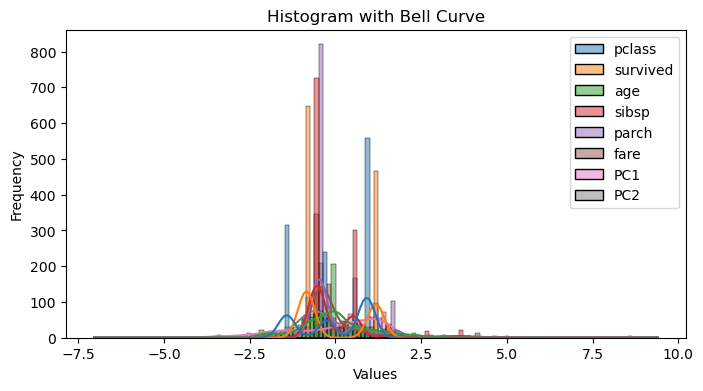

In [143]:
plt.figure(figsize=(8,4))
sns.histplot(data, kde=True)
plt.title("Histogram with Bell Curve")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()